## Analizing life expectancy and GDP

The goal of this project is to get a better understanding of life expectancy and if and how it is correlated with GDP.

Data provided by: [Codecademy](https://www.codecademy.com) 

*Data Scientist: Machine Learning course, Data Visualization Portfolio Project module.*

`all_data.csv`

### Project scope

#### Goals

Gaining insight on the provided data. As the title says we will look at data containing life expectancy and GDP ad main features, probably more infomation.

#### Analysis

The main focus is exploring the provided data (EDA) with necessary vizualisation in order to finally evaluate it. 

0. Importing necessary libraries

As a start we load numpy, pandas, matplotlib and seaborn for analysis and vizualisation.

In [95]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

1. Loading the data (first look)

First look what we got here, loading the data into a pandas DataFrame, look at the first few lines and get some information about the data.

In [96]:
raw_data = pd.read_csv("all_data.csv")
raw_data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


2. Setting the "North Star"

First we ask some questions what do we want to know? Which questions can be answered with the provided data.

- How did life expectancy developed across all nations?
- How did GDP developed through the years?
- Can we detect any correlation between GDP and life expectancy?
- What is the average life expectancy in these countries?

In [97]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [98]:
raw_data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


Before we move to the detective work, we define a function to make GDP more human readable.

In [99]:
def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you're dealing with Quadrillions!
    return '{:.2f}{}'.format(num, ['', 'K', 'M', 'B', 'T'][magnitude])

### Trends over time

Let us explore life expectancy, wheather it is stagnating or soaring in those countries.

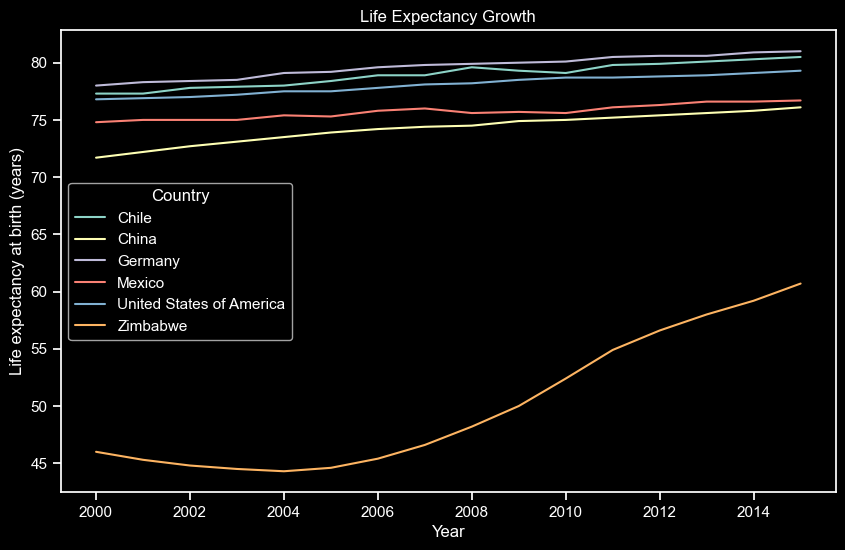

<Figure size 640x480 with 0 Axes>

In [100]:
plt.figure(figsize=(10,6))
sns.lineplot(data=raw_data, x='Year', y='Life expectancy at birth (years)', hue='Country')
plt.title('Life Expectancy Growth')
plt.show()
plt.clf()

### Correlation (scatter plot)

The eternal question: does more money ($) equals more years of life? Let us look at the "shape" of the data.

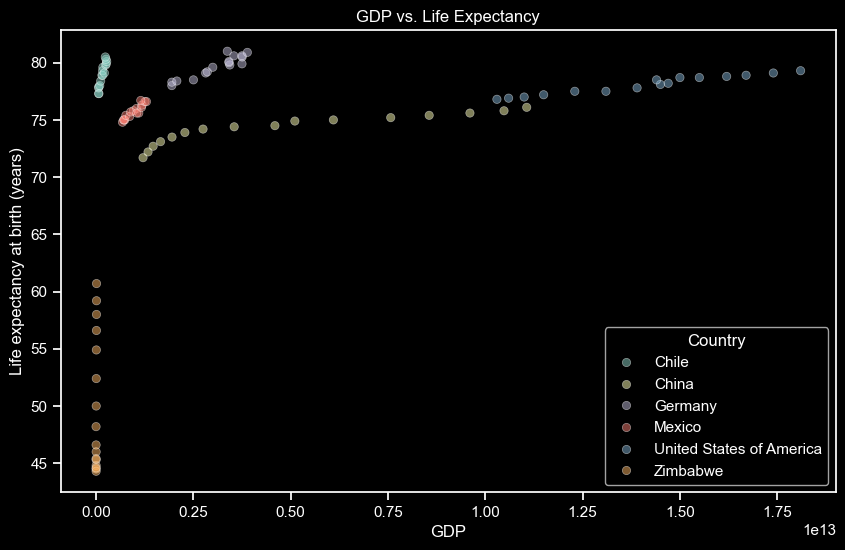

<Figure size 640x480 with 0 Axes>

In [101]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=raw_data, x='GDP', y='Life expectancy at birth (years)', hue='Country', alpha=0.5)
plt.title('GDP vs. Life Expectancy')
plt.show()
plt.clf()

### Statistical Deep Dive

Visuals can be deciving, so let us quantify the relationship with the **Pearson Correlation Coefficient**.

In [102]:
correlation = raw_data['GDP'].corr(raw_data['Life expectancy at birth (years)'])
print(f'The Pearson Correlation is: {correlation:.2f}')

The Pearson Correlation is: 0.34


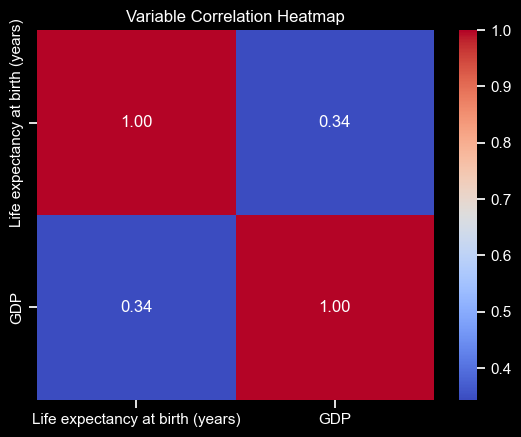

In [103]:
numeric_df = raw_data.drop('Year', axis=1).select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Variable Correlation Heatmap')
plt.show()

**Interpretation** 

A value close to 1.0 means a very strong correlation. In this case we can see **moderate positive correlation**. 

Which means that when GDP is growing we can expect life expectancy at birth to grow to. 

### Life expectancy per country

Let us look at the life expectancy in each country. First we aggragate the numbers and ignore time. Let us get the **mean** for each of them. 

In [104]:
le_mean = (raw_data.groupby("Country")['Life expectancy at birth (years)']
           .mean()
           .reset_index()
           .sort_values(by='Life expectancy at birth (years)', ascending=False))
le_mean

,Country,Life expectancy at birth (years)
2,Germany,79.65625
0,Chile,78.94375
4,United States of America,78.06250
3,Mexico,75.71875
1,China,74.26250
5,Zimbabwe,50.09375


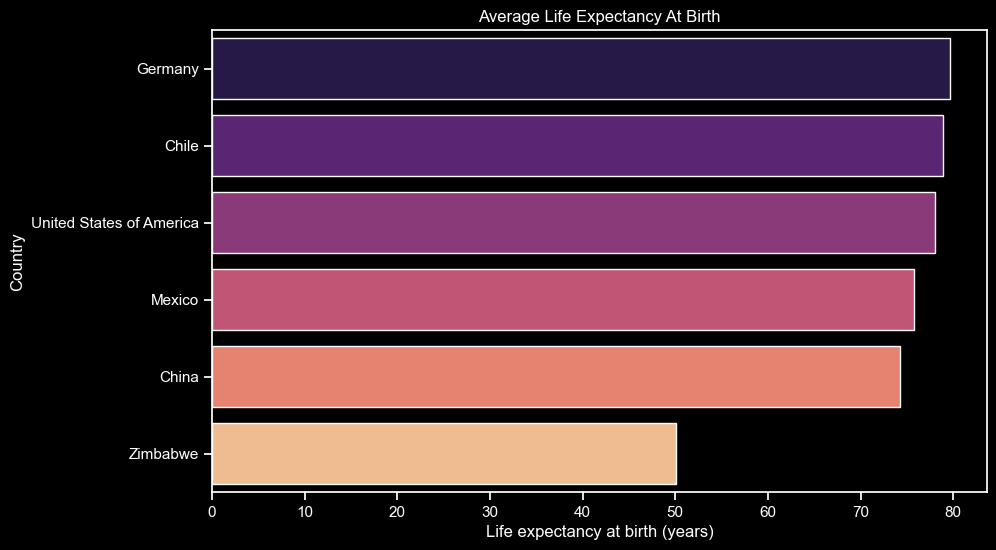

<Figure size 640x480 with 0 Axes>

In [105]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Life expectancy at birth (years)', 
    y='Country', 
    data=le_mean, 
    palette='magma',
    hue='Country'
)

plt.title('Average Life Expectancy At Birth')
plt.show()
plt.clf()

Now that we have the average life expectancy per country, let us investigate if "Wealth = Health". 

In [106]:
le_m_comparison = (raw_data.groupby('Country')
                   .agg({'Life expectancy at birth (years)': 'mean', 'GDP': 'mean'})
                   .reset_index()
                   .sort_values('Life expectancy at birth (years)', ascending=False))

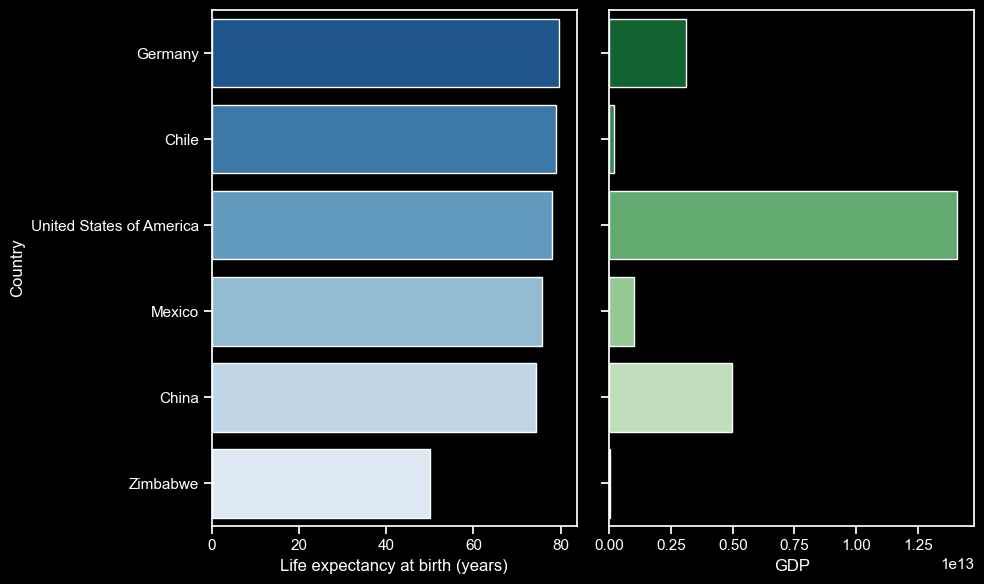

<Figure size 640x480 with 0 Axes>

In [107]:
fig, axis = plt.subplots(1, 2, figsize=(10,6))

sns.barplot(data=le_m_comparison, x='Life expectancy at birth (years)', y='Country',
            ax=axis[0], palette='Blues_r', hue='Country')

sns.barplot(data=le_m_comparison, x='GDP', y='Country',
            ax=axis[1], palette='Greens_r', hue='Country')
axis[1].set_ylabel('')     
axis[1].set_yticklabels([])

plt.tight_layout()
plt.show()
plt.clf()

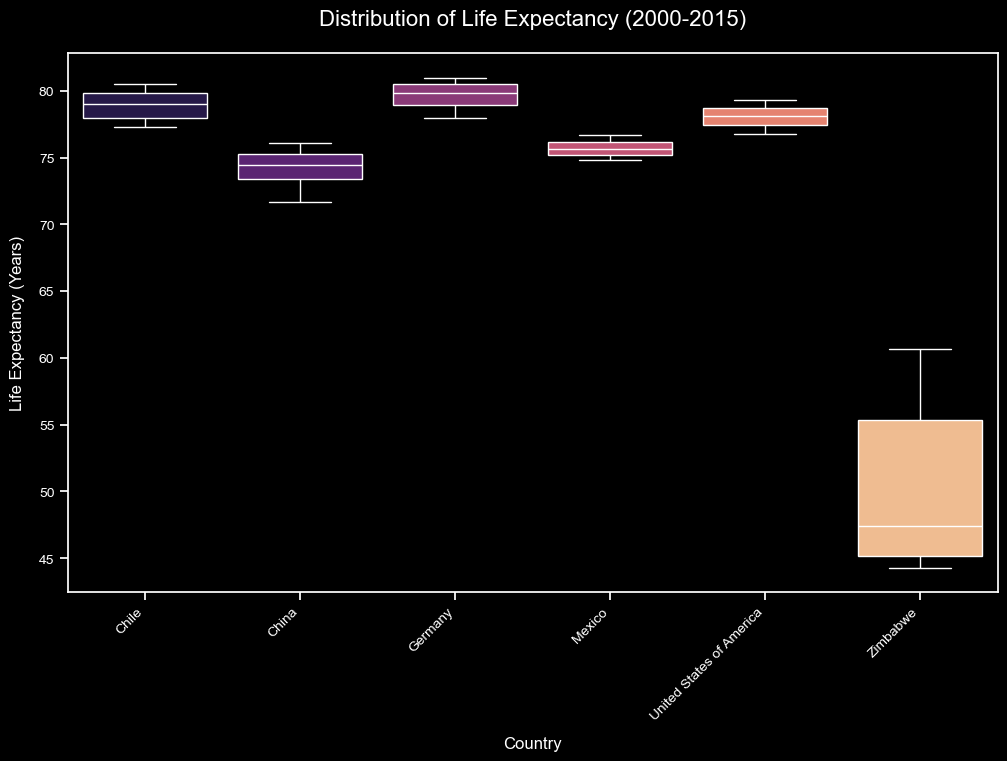

<Figure size 640x480 with 0 Axes>

In [108]:
sns.set_theme(style="ticks", palette="pastel")
plt.style.use('dark_background')

plt.figure(figsize=(12, 7))
sns.boxplot(
    data=raw_data, 
    x='Country', 
    y='Life expectancy at birth (years)', 
    palette='magma',
    hue='Country',
    legend=False,    
    linewidth=1,
    linecolor='white',   
    fliersize=5
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Distribution of Life Expectancy (2000-2015)', fontsize=16, pad=20, color='white')
plt.xlabel('Country', fontsize=12, labelpad=10)
plt.ylabel('Life Expectancy (Years)', fontsize=12, labelpad=10)

plt.show()
plt.clf()

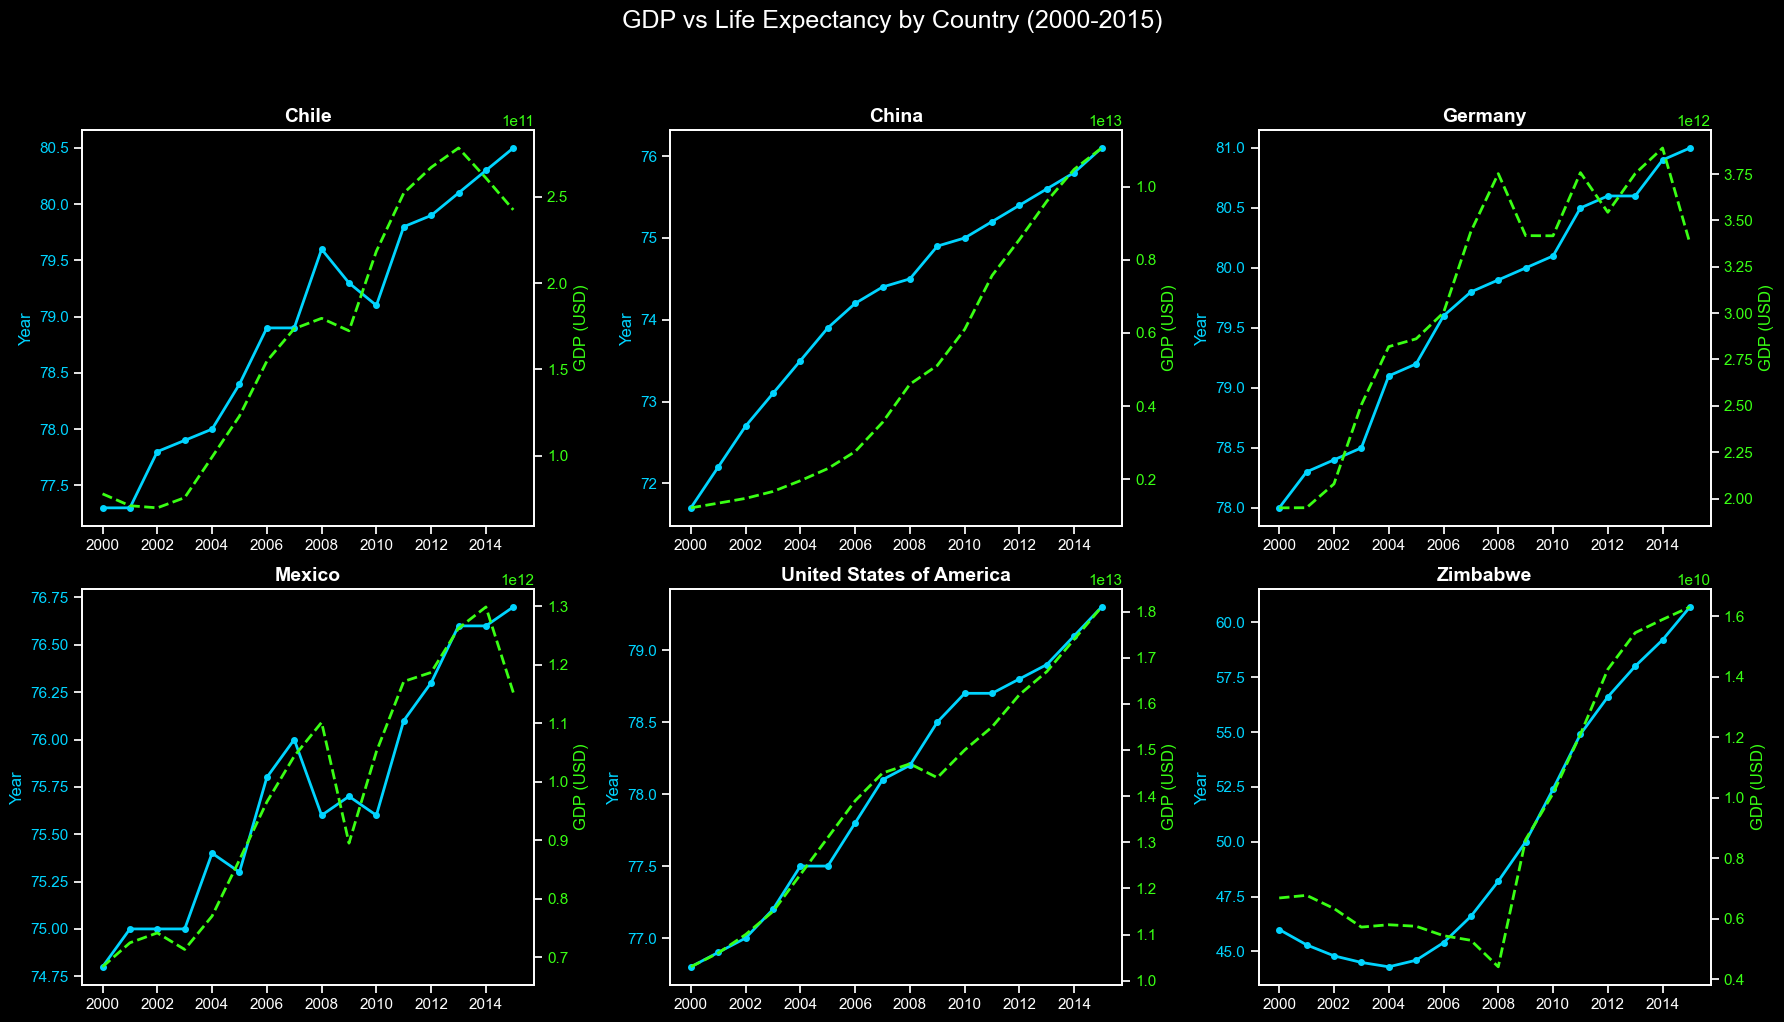

<Figure size 640x480 with 0 Axes>

In [109]:
countries = raw_data['Country'].unique()

fig, axis = plt.subplots(2, 3, figsize=(18,10))
axis = axis.flatten()

for i, country in enumerate(countries):
    data = raw_data[raw_data['Country'] == country]
    ax1 = axis[i]

    color_le = '#00d4ff'
    lns1 = ax1.plot(data['Year'], data['Life expectancy at birth (years)'],
                    color = color_le,
                    label = "Life Expectancy",
                    linewidth = 2,
                    marker = 'o',
                    markersize = 4)
    ax1.set_title(f'{country}', fontsize=14, fontweight='bold', color='white')
    ax1.set_ylabel('Year', color=color_le)
    ax1.tick_params(axis='y', labelcolor=color_le)

    ax2 = ax1.twinx()
    color_gdp = '#39ff14'
    lns2 = ax2.plot(data['Year'], data['GDP'],
                    color = color_gdp,
                    label = 'GDP',
                    linewidth = 2,
                    linestyle = '--')
    ax2.set_ylabel('GDP (USD)', color=color_gdp)
    ax2.tick_params(axis='y', labelcolor=color_gdp)

    ax2.grid(False)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('GDP vs Life Expectancy by Country (2000-2015)', fontsize=18, y=1.02)
plt.show()
plt.clf()



**Individual Scaling:** 

Zimbabwe's Life Expectancy (which starts in the 40s) is just as visible as Germany's (which starts in the 70s). If they were on the same chart, Zimbabwe would look like a flat line at the bottom. (seen above in the average life expectancy boxplot)

**Dual-Axis Alignment:** 

By overlaying the lines, we can see Correlation in Motion. For example, in many countries, we see the green GDP line dip slightly (maybe during the 2008 recession), and we can immediately check if the cyan Life Expectancy line dipped as well.


## Conclusion

1. **Universal Growth**: Every country in the dataset saw an increase in Life Expectancy, regardless of economic growth.

2. **Zimbabwe Miracle**: There is a massive upward hook in Zimbabwe's Life Expectancy toward the end of the decade.

3. **GDP Volatility vs Health Stability**: GDP is often "noisy", while Life Expectancy is "smooth". This suggests health is a long-term investment that isn't immidiately destroyed by a bad economic year. 